# Data preprocessing

Notebook that will analye and create graphics to help to analyze data related with water, power, gas, and others...

- Process the data and analyse the consumption of water, power and gas.
- Create graph that show the consumption per month, seasons, years, fiscal years.
- Verify the influence of weather in cosnumption
- Forecast consumption given  specific weather
- Forecast cost given external factors (contract price, gas prive variation, kwh price variation)

In [8]:
# import area
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

In [9]:
# variablez
path = "../data_storage/"
# path to gas data
gas = path + "gas.csv"
# path to electricity data
power = path + "power.csv"
# path to water data
water = path + "water.csv"
# path to power_price_consumption data
power_price = path + "power_price_domestic_belgium.csv"
df_power_price = pd.DataFrame()

In [7]:
# convert csv to dataframe
df = pd.DataFrame()


def conv_df(file):
    split_file = file.split("/")[-1].split(".")[0]
    # check if the file exists
    if os.path.exists(file):
        # convert the csv to dataframe
        df = pd.read_csv(file)
        print(f"{split_file} has been converted to a dataframe")
        # get the file name
        name = split_file
        # create a variable with the name of the file
        globals()["df_" + name] = df
        # return the dataframe
        return df
    else:
        print(f"{split_file} does not exist")
        return None


# convert the csv files to dataframes
conv_df(power_price)

power_price_domestic_belgium does not exist


In [4]:
# process the power_price data
def proc_power_price(df):
    # drop the second column
    df = df.drop(df.columns[1], axis=1)
    # rename the columns
    df.columns = ["date", "price"]
    # convert the date to datetime
    df["date"] = pd.to_datetime(df["date"])
    # replace commas with periods in the price column
    df["price"] = df["price"].str.replace(",", ".")
    # convert the price to float
    df["price"] = df["price"].astype(float)
    # sort the values by date ascending
    df = df.sort_values(by="date", ascending=True)
    # set the date as the index
    df = df.set_index("date")
    # resample to monthly and fill the missing values with the interpolation method
    df = df.resample("ME").mean().interpolate()
    df_power_price = df

    return df_power_price


df_power_price = proc_power_price(conv_df(power_price))

power_price_domestic_belgium does not exist


AttributeError: 'NoneType' object has no attribute 'drop'

In [61]:
df.head(50)

""


In [62]:
# function to convert csv in data_storage (gas.csv, power.csv, water.csv and others) to pd dataframe that will named df_gas, df_power, df_water and others depending on the file name
def csv_to_df(file):
    split_file = file.split("/")[-1].split(".")[0]
    # check if the file exist
    if os.path.exists(file):
        # read the file
        df = pd.read_csv(file)
        # index the file by date_eom
        df["date_eom"] = pd.to_datetime(df["date_eom"])
        # convert date_eom to datetime
        df.set_index("date_eom", inplace=True)
        # keep date_eom and calc_cons columns
        df = df[["calc_cons"]]
        # change the name of calc_cons to the name of the file
        df.rename(columns={"calc_cons": split_file}, inplace=True)
        # get the file name
        name = split_file
        # create a variable with the name of the file
        globals()["df_" + name] = df
        # return the file
        return df
    else:
        # return a message if the file does not exist
        return "The file does not exist"


csv_to_df(water)
csv_to_df(gas)
csv_to_df(power)
# csv_to_df(power_price)

,power
date_eom,
2011-06-30,122.056856
2011-07-31,126.125418
2011-08-31,126.125418
2011-09-30,122.056856
2011-10-31,126.125418
...,...
2024-08-31,NaN
2024-09-30,NaN
2024-10-31,NaN


In [63]:
df_water.head()

,water
date_eom,
2011-06-30,6.585366
2011-07-31,7.721578
2011-08-31,8.300546
2011-09-30,8.032787
2011-10-31,8.300546


In [64]:
# function to get description, info and head of the dataframe
def get_info(df):
    # get the description of the dataframe
    description = df.describe()
    # get the info of the dataframe
    info = df.info()
    # get the head of the dataframe
    head = df.head()
    # return the description, info and head of the dataframe
    return description, info, head


get_info(df_power)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2011-06-30 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   183 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


(            power
 count  183.000000
 mean    83.969282
 std     25.013594
 min     12.790610
 25%     74.244318
 50%     87.316667
 75%     96.120833
 max    129.715625,
 None,
                  power
 date_eom              
 2011-06-30  122.056856
 2011-07-31  126.125418
 2011-08-31  126.125418
 2011-09-30  122.056856
 2011-10-31  126.125418)

# Exploratory for water

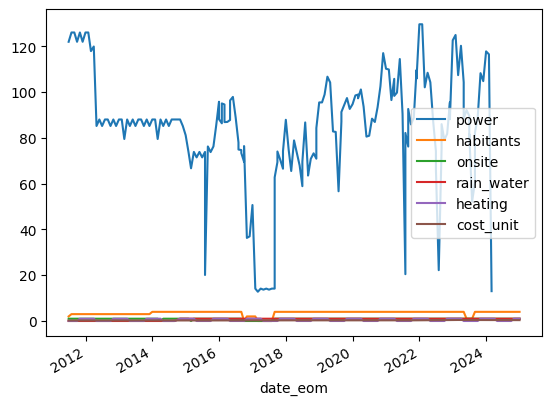

In [73]:
# function to graph the dataframe
def graph_df(df):
    # import matplotlib
    import matplotlib.pyplot as plt

    # plot the dataframe
    df.plot()
    # show the plot
    plt.show()


graph_df(df_power)

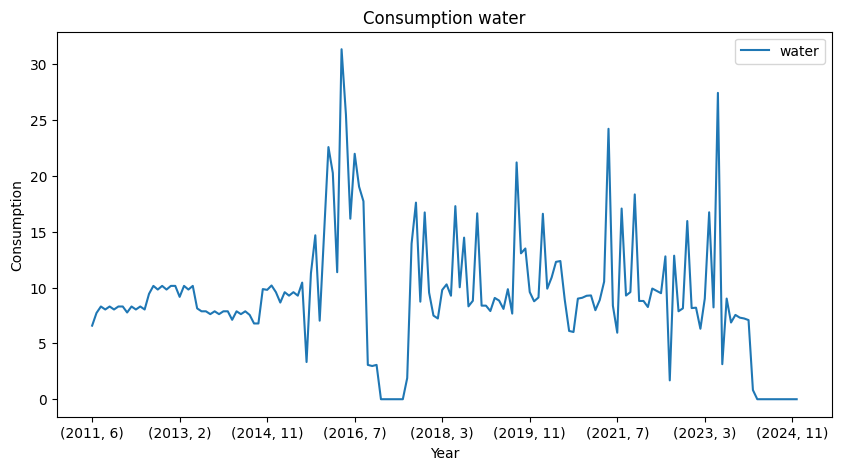

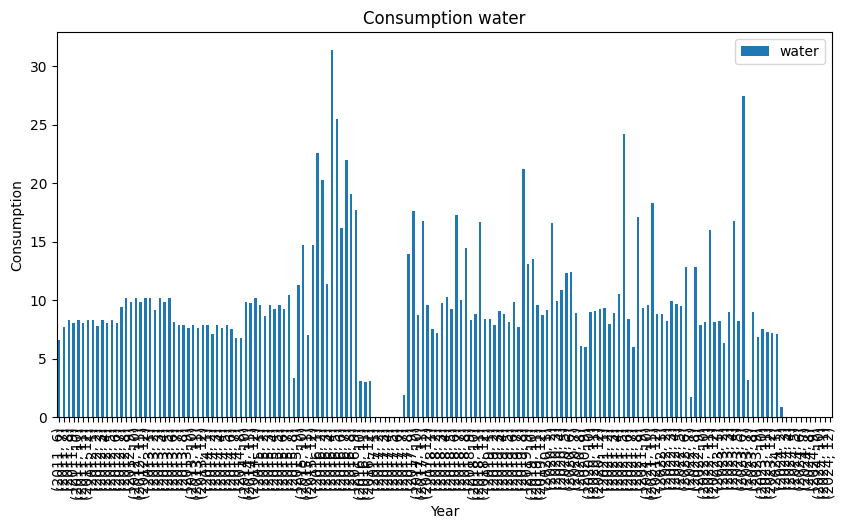

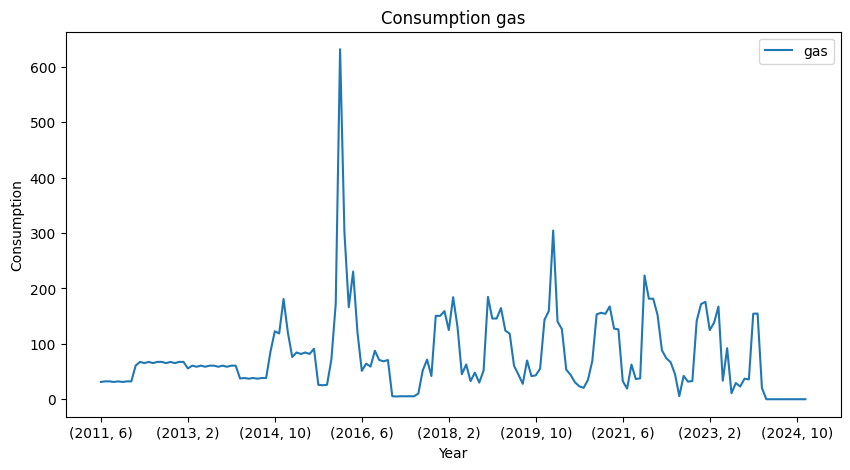

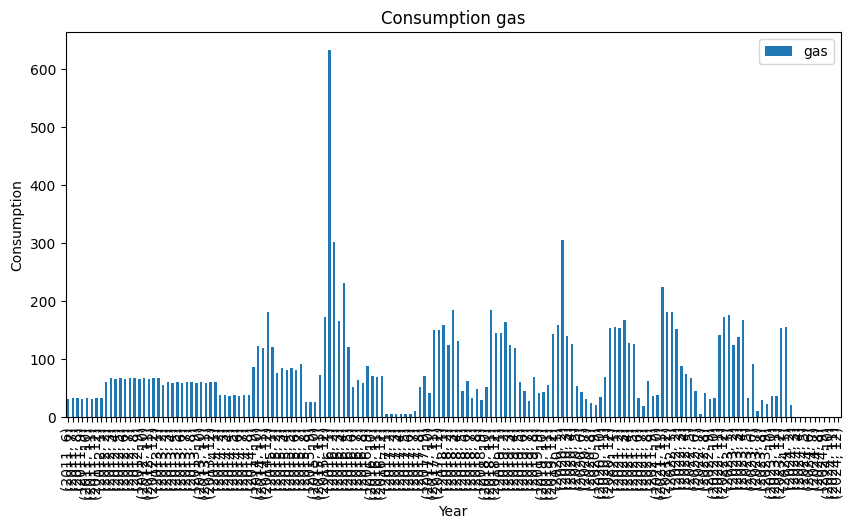

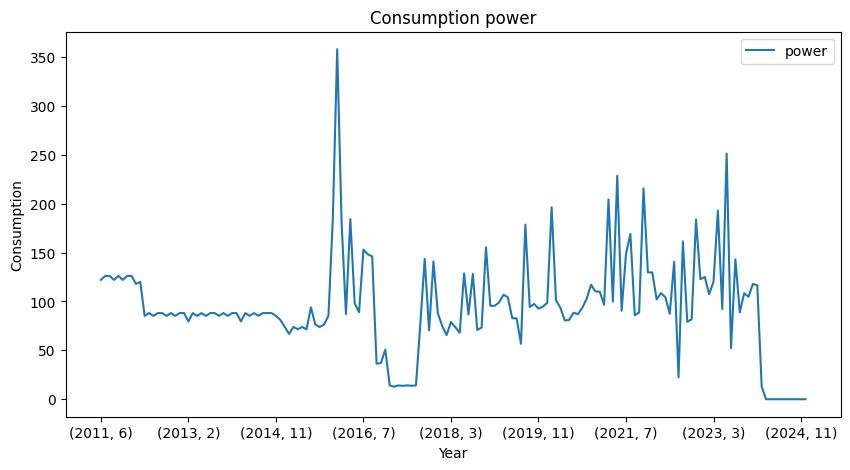

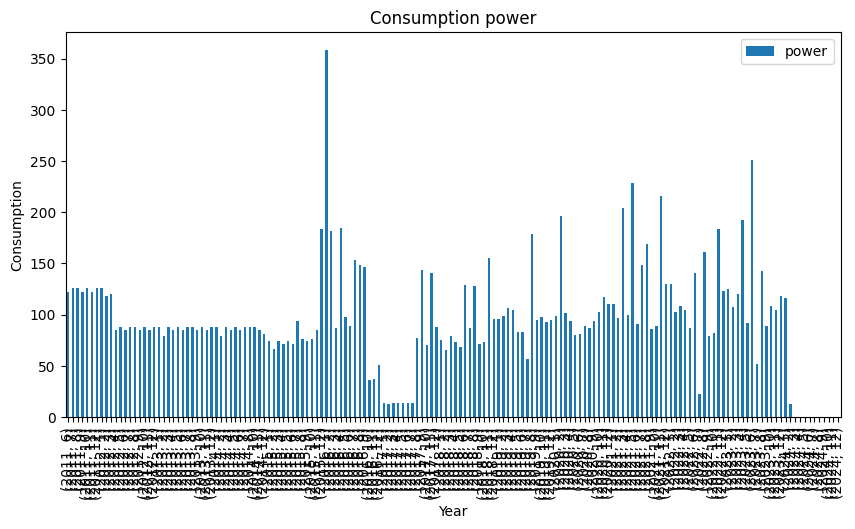

In [66]:
# function to group by year and month and graph the dataframe
def group_by(df):

    # group by year and month
    df = df.groupby([df.index.year, df.index.month]).sum()
    # plot the dataframe
    df.plot(
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Year",
        ylabel="Consumption",
        figsize=(10, 5),
    )
    df.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 5),
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Year",
        ylabel="Consumption",
    )

    # show the plot
    plt.show()


group_by(df_water)
group_by(df_gas)
group_by(df_power)

In [67]:
# Add a column habitants
def add_habitants(df):
    # create a column with 0
    df["habitants"] = 0
    # fill the column with the values
    df.loc[:"2011-07-15", "habitants"] = 2
    df.loc["2011-07-15":"2013-11-30", "habitants"] = 3
    df.loc["2013-12-01":"2016-09-01", "habitants"] = 4
    df.loc["2013-12-01":"2016-09-01", "habitants"] = 4
    df.loc["2016-10-02":"2017-02-02", "habitants"] = 2
    df.loc["2017-08-01":"2023-05-06", "habitants"] = 4
    df.loc["2023-05-07":"2023-08-10", "habitants"] = 1
    df.loc["2023-08-11":, "habitants"] = 4
    # return the dataframe
    return df


add_habitants(df_power)

,power,habitants
date_eom,,
2011-06-30,122.056856,2
2011-07-31,126.125418,3
2011-08-31,126.125418,3
2011-09-30,122.056856,3
2011-10-31,126.125418,3
...,...,...
2024-08-31,NaN,4
2024-09-30,NaN,4
2024-10-31,NaN,4


In [68]:
# add a column on-site, 1 is on site, 0 is off site (off site dates: 2015-02-20 to 2015-03-08, 2016-09-15 to 2017-08-10, 2014-03-10 to 2014-04-11,2016-08-28 to 2016-08-25, 2013-03-26 to 2013-03-30)
def add_onsite(df):
    # create a column with 0
    df["onsite"] = 1
    # fill the column with the values
    df.loc["2015-02-20":"2015-03-08", "onsite"] = 0
    df.loc["2016-09-15":"2017-08-10", "onsite"] = 0
    df.loc["2014-03-10":"2014-04-11", "onsite"] = 0
    df.loc["2016-08-28":"2016-08-25", "onsite"] = 0
    df.loc["2013-03-26":"2013-03-30", "onsite"] = 0
    # return the dataframe
    return df


add_onsite(df_power)

,power,habitants,onsite
date_eom,,,
2011-06-30,122.056856,2,1
2011-07-31,126.125418,3,1
2011-08-31,126.125418,3,1
2011-09-30,122.056856,3,1
2011-10-31,126.125418,3,1
...,...,...,...
2024-08-31,NaN,4,1
2024-09-30,NaN,4,1
2024-10-31,NaN,4,1


In [69]:
# function add column with rain_water usage, 1 is rain water, 0 is not rain water (rain water dates: since 2014-09-03)
def add_rain_water(df):
    # create a column with 0
    df["rain_water"] = 0
    # fill the column with the values
    df.loc["2014-09-03":, "rain_water"] = 1
    # return the dataframe
    return df


add_rain_water(df_power)

,power,habitants,onsite,rain_water
date_eom,,,,
2011-06-30,122.056856,2,1,0
2011-07-31,126.125418,3,1,0
2011-08-31,126.125418,3,1,0
2011-09-30,122.056856,3,1,0
2011-10-31,126.125418,3,1,0
...,...,...,...,...
2024-08-31,NaN,4,1,1
2024-09-30,NaN,4,1,1
2024-10-31,NaN,4,1,1


In [70]:
# function to heating on, 1 is heating on, 0 is heating off (heating on dates: winter months)
def add_heating(df):
    # create a column with 0
    df["heating"] = 0
    # fill the column with the values
    df.loc[df.index.month.isin([1, 2, 3, 10, 11, 12]), "heating"] = 1
    # return the dataframe
    return df


add_heating(df_power)

,power,habitants,onsite,rain_water,heating
date_eom,,,,,
2011-06-30,122.056856,2,1,0,0
2011-07-31,126.125418,3,1,0,0
2011-08-31,126.125418,3,1,0,0
2011-09-30,122.056856,3,1,0,0
2011-10-31,126.125418,3,1,0,1
...,...,...,...,...,...
2024-08-31,NaN,4,1,1,0
2024-09-30,NaN,4,1,1,0
2024-10-31,NaN,4,1,1,1


In [72]:
# add column with cost_unit if gas = 0.05, power = 0.15, water = 0.01
def add_cost_unit(df):
    # create a column with 0
    df["cost_unit"] = 0
    # fill the column with the values
    if "water" in df.columns:
        df["cost_unit"] = 0.01
    elif "gas" in df.columns:
        df["cost_unit"] = 0.05
    # add the power_price from df_power_price to df by the date
    elif "power" in df.columns:
        # unify the index of the two dataframes
        df_power_price.index = df_power_price.index.tz_localize(None)
        df.index = df.index.tz_localize(None)
        # add the power_price to the df by the date if not date, fill with the last value
        df["cost_unit"] = df_power_price["price"]
        df["cost_unit"] = df["cost_unit"].fillna(method="ffill")

        # return the dataframe
    return df


add_cost_unit(df_power)

C:\Users\zudel\AppData\Local\Temp\ipykernel_18064\3797567821.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["cost_unit"] = df["cost_unit"].fillna(method="ffill")


,power,habitants,onsite,rain_water,heating,cost_unit
date_eom,,,,,,
2011-06-30,122.056856,2,1,0,0,0.213600
2011-07-31,126.125418,3,1,0,0,0.213317
2011-08-31,126.125418,3,1,0,0,0.213033
2011-09-30,122.056856,3,1,0,0,0.212750
2011-10-31,126.125418,3,1,0,1,0.212467
...,...,...,...,...,...,...
2024-08-31,NaN,4,1,1,0,0.377800
2024-09-30,NaN,4,1,1,0,0.377800
2024-10-31,NaN,4,1,1,1,0.377800


# SQL DB